<a href="https://colab.research.google.com/github/kookyflyer/DataAnalysis_Python/blob/main/Copy_of_Sentiment_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_product_data.csv to amazon_product_data.csv


In [ ]:
import pandas as pd
import numpy as np
import joblib
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

from collections import Counter
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.models import load_model



In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Index(['color', 'image_links', 'descriptions', 'kind_product', 'ratings',
       'number_of_ratings', 'status', 'number_of_buyers_last_month_more_than',
       'typical_price', 'price', 'you_save', 'discount', 'brand', 'os',
       'cpu_model', 'resolution', 'name', 'wireless_carrier',
       'cellular_technology', 'dimensions', 'asin', 'model', 'amazon_renewed',
       'renewed_smartphones', 'battery_capacity', 'battery_power',
       'charging_time', 'ram', 'storage', 'screen_size',
       'connectivity_technologies', 'wireless_network', 'cpu_speed',
       'reviews_usa', 'reviews_other'],
      dtype='object')
Missing values in y_train: 0
Initial Shape of X_test: (240, 5000)
Initial Shape of y_test: (240,)
Missing values in y_test: 104
New Shape of X_test: (136, 5000)
New Shape of y_test: (136,)

=== Logistic Regression Evaluation ===
Accuracy : 83.09%
Precision: 95.26%
Recall   : 83.09%
F1 Score : 88.76%
Classification Report:
               precision    recall  f1-score   support


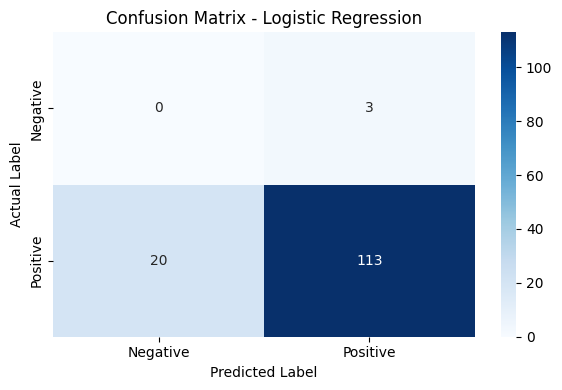


=== Random Forest Evaluation ===
Accuracy : 82.35%
Precision: 95.24%
Recall   : 82.35%
F1 Score : 88.33%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.97      0.84      0.90       133

    accuracy                           0.82       136
   macro avg       0.49      0.42      0.45       136
weighted avg       0.95      0.82      0.88       136



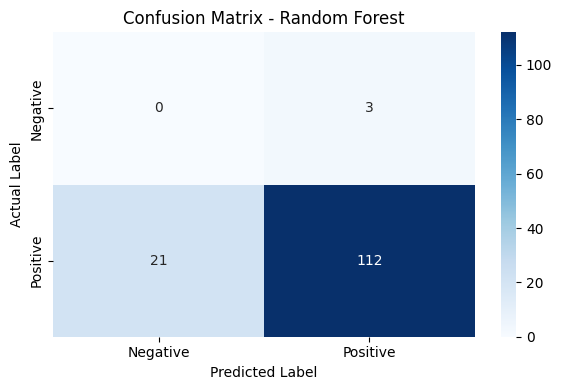


=== LSTM MODEL TRAINING ===
Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.8438 - loss: 0.5412 - val_accuracy: 0.9737 - val_loss: 0.1269
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9651 - loss: 0.1590 - val_accuracy: 0.9737 - val_loss: 0.1167
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9602 - loss: 0.1547 - val_accuracy: 0.9737 - val_loss: 0.1057
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9527 - loss: 0.1672 - val_accuracy: 0.9737 - val_loss: 0.1094
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9637 - loss: 0.1349 - val_accuracy: 0.9737 - val_loss: 0.0974



=== LSTM MODEL EVALUATION ===
LSTM Accuracy: 95.10%

Models and vectorizer saved as .pkl files.

LSTM model (.h5) and tokenizer (.pkl) saved.


In [ ]:
df = pd.read_csv("amazon_product_data.csv")
print(df.columns)

df = df.dropna(subset=['reviews_usa', 'ratings'])

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


df['Cleaned_Review'] = df['reviews_usa'].apply(clean_text)


def label_sentiment(star):
    if star >= 4:
        return 1
    elif star <= 2:
        return 0
    else:
        return None
df['Sentiment'] = df['ratings'].apply(label_sentiment)


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_imputer = SimpleImputer(strategy='constant', fill_value=0)
y_train = y_train_imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train = y_train.ravel()


X_test_cleaned = X_test[~y_test.isnull()]
y_test_cleaned = y_test.dropna()


print(f"Missing values in y_train: {np.sum(np.isnan(y_train))}")
print(f"Initial Shape of X_test: {X_test.shape}")
print(f"Initial Shape of y_test: {y_test.shape}")
print(f"Missing values in y_test: {y_test.isnull().sum()}")
print(f"New Shape of X_test: {X_test_cleaned.shape}")
print(f"New Shape of y_test: {y_test_cleaned.shape}")


nan_mask = ~y_test.isna()

X_test_cleaned = X_test[nan_mask]
y_test_cleaned = y_test[nan_mask]


log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_pred_log_cleaned = y_pred_log[nan_mask]

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_cleaned = y_pred_rf[nan_mask]





def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} Evaluation ===")
    print(f"Accuracy : {accuracy_score(y_test_cleaned, y_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted', zero_division=0) * 100:.2f}%")
    print(f"Recall   : {recall_score(y_true, y_pred, average='weighted', zero_division=0) * 100:.2f}%")
    print(f"F1 Score : {f1_score(y_true, y_pred, average='weighted', zero_division=0) * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative", "Positive"],
                yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()

evaluate_model("Logistic Regression", y_test_cleaned, y_pred_log_cleaned)
plot_confusion_matrix(y_test_cleaned, y_pred_log_cleaned, "Logistic Regression")

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_cleaned = y_pred_rf[nan_mask]

evaluate_model("Random Forest", y_test_cleaned, y_pred_rf_cleaned)
plot_confusion_matrix(y_test_cleaned, y_pred_rf_cleaned, "Random Forest")


print("\n=== LSTM MODEL TRAINING ===")
df_lstm = df.dropna(subset=['Sentiment'])

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_lstm['Cleaned_Review'])

X_seq = tokenizer.texts_to_sequences(df_lstm['Cleaned_Review'])
X_pad = pad_sequences(X_seq, maxlen=100)

label_encoder = LabelEncoder()
y_lstm = label_encoder.fit_transform(df_lstm['Sentiment'])

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_lstm, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train_lstm, validation_split=0.2, epochs=5, batch_size=32, verbose=1)

loss, lstm_acc = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\n=== LSTM MODEL EVALUATION ===")
print(f"LSTM Accuracy: {lstm_acc * 100:.2f}%")

output = pd.DataFrame({
    "actual": y_test,
    "pred_logistic": y_pred_log,
    "pred_random_forest": y_pred_rf
})
output.to_csv("model_predictions.csv", index=False)

joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("\nModels and vectorizer saved as .pkl files.")

model.save('lstm_model.h5')

import pickle
with open('lstm_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("\nLSTM model (.h5) and tokenizer (.pkl) saved.")

In [ ]:
with open('lstm_tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

new_text = "The phone works well but the battery doesnt last and it is slow."

sequence = tokenizer.texts_to_sequences([new_text])
padded = pad_sequences(sequence, maxlen=100)

prediction = model.predict(padded)

predicted_class = prediction.argmax(axis=-1)[0]

print(f"Predicted Sentiment: {'Positive' if predicted_class == 1 else 'Negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Sentiment: Negative
